<a href="https://colab.research.google.com/github/itsamirkhon/crop_yeild_prediction_model/blob/main/Crop_yield_prediction_model_iypnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
pesticides_data = pd.read_csv('pesticides.csv')
rainfall_data = pd.read_csv('rainfall.csv')
temp_data = pd.read_csv('temp.csv')
yield_data = pd.read_csv('yield.csv')

**Pesticides data**

In [60]:
pesticides_data.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1990,tonnes,121
1,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1991,tonnes,121
2,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1992,tonnes,121
3,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1993,tonnes,121
4,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1994,tonnes,201


In [61]:
pesticides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   4789 non-null   object
 1   Area     4789 non-null   object
 2   Element  4789 non-null   object
 3   Item     4789 non-null   object
 4   Year     4789 non-null   int64 
 5   Unit     4789 non-null   object
 6   Value    4789 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 262.0+ KB


In [62]:
pesticides_data.describe()

,Year,Value
count,4789.0000,4789.0000
mean,2004.1426,28947.1819
std,8.3026,162720.6583
min,1990.0000,0.0000
25%,1997.0000,99.0000
50%,2004.0000,1221.0000
75%,2011.0000,7420.0000
max,2018.0000,1815690.0000


In [63]:
len(pesticides_data['Area'].unique())

172

In [64]:
len(pesticides_data['Year'].unique())

29

In [65]:
pesticides_df = pesticides_data.drop(['Domain', 'Element'], axis=1)
pesticides_df

,Area,Item,Year,Unit,Value
0,Albania,Pesticides (total),1990,tonnes,121
1,Albania,Pesticides (total),1991,tonnes,121
2,Albania,Pesticides (total),1992,tonnes,121
3,Albania,Pesticides (total),1993,tonnes,121
4,Albania,Pesticides (total),1994,tonnes,201
...,...,...,...,...,...
4784,Zimbabwe,Pesticides (total),2014,tonnes,2185
4785,Zimbabwe,Pesticides (total),2015,tonnes,2185
4786,Zimbabwe,Pesticides (total),2016,tonnes,2185
4787,Zimbabwe,Pesticides (total),2017,tonnes,2185


**Rainfall data**

In [66]:
rainfall_data

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.7448,1901,Jan Average,Afghanistan,AFG
1,13.9480,1901,Feb Average,Afghanistan,AFG
2,43.8464,1901,Mar Average,Afghanistan,AFG
3,26.9610,1901,Apr Average,Afghanistan,AFG
4,52.9579,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
272827,2.0393,2016,Aug Average,Zimbabwe,ZWE
272828,0.4807,2016,Sep Average,Zimbabwe,ZWE
272829,9.1341,2016,Oct Average,Zimbabwe,ZWE
272830,72.9508,2016,Nov Average,Zimbabwe,ZWE


In [67]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Rainfall - (MM)  272832 non-null  float64
 1    Year            272832 non-null  int64  
 2    Statistics      272832 non-null  object 
 3    Country         272832 non-null  object 
 4    ISO3            272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [68]:
rainfall_data.columns = rainfall_data.columns.str.lstrip()
print(rainfall_data.columns)

Index(['Rainfall - (MM)', 'Year', 'Statistics', 'Country', 'ISO3'], dtype='object')


In [69]:
rainfall_data.describe()

,Rainfall - (MM),Year
count,272832.0000,272832.0000
mean,103.4709,1958.5000
std,113.2319,33.4851
min,0.0000,1901.0000
25%,24.1684,1929.7500
50%,66.4316,1958.5000
75%,149.6472,1987.2500
max,2699.1900,2016.0000


In [70]:
print(rainfall_data.columns)

Index(['Rainfall - (MM)', 'Year', 'Statistics', 'Country', 'ISO3'], dtype='object')


In [71]:
len(rainfall_data['Country'].unique())

196

In [72]:
len(rainfall_data['Year'].unique())

116

In [73]:
rainfall_data.head()

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.7448,1901,Jan Average,Afghanistan,AFG
1,13.9480,1901,Feb Average,Afghanistan,AFG
2,43.8464,1901,Mar Average,Afghanistan,AFG
3,26.9610,1901,Apr Average,Afghanistan,AFG
4,52.9579,1901,May Average,Afghanistan,AFG


In [74]:
rainfall_df = rainfall_data.groupby(['Year', 'Country', 'ISO3'], as_index=False).sum()
rainfall_df.head()

,Year,Country,ISO3,Rainfall - (MM),Statistics
0,1901,Afghanistan,AFG,250.9236,Jan Average Feb Average Mar Average Apr Avera...
1,1901,Albania,ALB,1244.1374,Jan Average Feb Average Mar Average Apr Avera...
2,1901,Algeria,DZA,113.4528,Jan Average Feb Average Mar Average Apr Avera...
3,1901,Andorra,AND,871.3115,Jan Average Feb Average Mar Average Apr Avera...
4,1901,Angola,AGO,931.0102,Jan Average Feb Average Mar Average Apr Avera...


**Temperature data**

In [75]:
temp_data

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.0378,1901,Jan Average,Afghanistan,AFG
1,2.4235,1901,Feb Average,Afghanistan,AFG
2,9.3623,1901,Mar Average,Afghanistan,AFG
3,13.5564,1901,Apr Average,Afghanistan,AFG
4,18.1509,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
272827,18.7555,2016,Aug Average,Zimbabwe,ZWE
272828,22.9919,2016,Sep Average,Zimbabwe,ZWE
272829,25.8664,2016,Oct Average,Zimbabwe,ZWE
272830,25.8515,2016,Nov Average,Zimbabwe,ZWE


In [76]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Temperature - (Celsius)  272832 non-null  float64
 1    Year                    272832 non-null  int64  
 2    Statistics              272832 non-null  object 
 3    Country                 272832 non-null  object 
 4    ISO3                    272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [77]:
temp_data.columns = temp_data.columns.str.lstrip()
print(temp_data.columns)

Index(['Temperature - (Celsius)', 'Year', 'Statistics', 'Country', 'ISO3'], dtype='object')


In [78]:
temp_data.describe()

,Temperature - (Celsius),Year
count,272832.0000,272832.0000
mean,18.6315,1958.5000
std,10.2486,33.4851
min,-34.1210,1901.0000
25%,13.2316,1929.7500
50%,22.7363,1958.5000
75%,25.7977,1987.2500
max,38.5669,2016.0000


In [79]:
len(temp_data['Country'].unique())

196

In [80]:
len(temp_data['Year'].unique())

116

In [81]:
temp_data.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.0378,1901,Jan Average,Afghanistan,AFG
1,2.4235,1901,Feb Average,Afghanistan,AFG
2,9.3623,1901,Mar Average,Afghanistan,AFG
3,13.5564,1901,Apr Average,Afghanistan,AFG
4,18.1509,1901,May Average,Afghanistan,AFG


In [82]:
numeric_cols = temp_data.select_dtypes(include=['number']).columns

temp_df = temp_data.groupby(['Year', 'Country', 'ISO3'], as_index=False)[numeric_cols].mean()
temp_df.head()

,Country,ISO3,Temperature - (Celsius),Year
0,Afghanistan,AFG,13.1729,1901.0000
1,Albania,ALB,11.0309,1901.0000
2,Algeria,DZA,22.2900,1901.0000
3,Andorra,AND,9.9606,1901.0000
4,Angola,AGO,21.3657,1901.0000


**Yield data**

In [83]:
yield_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops,Afghanistan,Yield,Barley,1961,hg/ha,10800
1,Crops,Afghanistan,Yield,Barley,1962,hg/ha,10800
2,Crops,Afghanistan,Yield,Barley,1963,hg/ha,10800
3,Crops,Afghanistan,Yield,Barley,1964,hg/ha,10857
4,Crops,Afghanistan,Yield,Barley,1965,hg/ha,10857
...,...,...,...,...,...,...,...
63686,Crops,Zimbabwe,Yield,Wheat,2015,hg/ha,20486
63687,Crops,Zimbabwe,Yield,Wheat,2016,hg/ha,19013
63688,Crops,Zimbabwe,Yield,Wheat,2017,hg/ha,17542
63689,Crops,Zimbabwe,Yield,Wheat,2018,hg/ha,16379


In [84]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63691 entries, 0 to 63690
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   63691 non-null  object
 1   Area     63691 non-null  object
 2   Element  63691 non-null  object
 3   Item     63691 non-null  object
 4   Year     63691 non-null  int64 
 5   Unit     63691 non-null  object
 6   Value    63691 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.4+ MB


In [85]:
yield_data.describe()

,Year,Value
count,63691.0000,63691.0000
mean,1992.3327,85811.1254
std,16.8888,100887.9844
min,1961.0000,0.0000
25%,1978.0000,17707.0000
50%,1994.0000,47059.0000
75%,2007.0000,118507.0000
max,2019.0000,2236842.0000


In [86]:
len(yield_data['Area'].unique())

203

In [87]:
len(yield_data['Year'].unique())

59

In [88]:
yield_df = yield_data.drop(['Domain', 'Element'], axis=1)
yield_df.head()

,Area,Item,Year,Unit,Value
0,Afghanistan,Barley,1961,hg/ha,10800
1,Afghanistan,Barley,1962,hg/ha,10800
2,Afghanistan,Barley,1963,hg/ha,10800
3,Afghanistan,Barley,1964,hg/ha,10857
4,Afghanistan,Barley,1965,hg/ha,10857


In [89]:
pesticides_df = pesticides_data.drop(['Domain', 'Element'], axis=1)
if 'Unit' in pesticides_df.columns:
    pesticides_df.drop('Unit', axis=1, inplace=True)
if 'Item' in pesticides_df.columns:
    pesticides_df.drop('Item', axis=1, inplace=True)
pesticides_df.rename({'Area': 'Country', 'Value': 'Pesticides (tonnes)'}, axis=1, inplace=True)

In [90]:
rainfall_df = rainfall_data.groupby(['Year', 'Country', 'ISO3'], as_index=False).sum()
rainfall_df.rename({'Rainfall - (MM)': 'Rainfall (mm)'}, axis=1, inplace=True)
rainfall_df['Country'] = rainfall_df['Country'].str.strip()

In [91]:
numeric_cols = temp_data.select_dtypes(include=['number']).columns
temp_df = temp_data.groupby(['Year', 'Country', 'ISO3'], as_index=False)[numeric_cols].mean()
temp_df.rename({'Temperature - (Celsius)': 'Temperature (Celsius)'}, axis=1, inplace=True)
temp_df['Country'] = temp_df['Country'].str.strip()

In [92]:
yield_df = yield_data.drop(['Domain', 'Element'], axis=1)
if 'Unit' in yield_df.columns:
    yield_df.drop('Unit', axis=1, inplace=True)
yield_df.rename({'Area': 'Country', 'Value': 'Yield (hg/ha)'}, axis=1, inplace=True)

In [93]:
rain_temp_df = pd.merge(rainfall_df, temp_df, on=['Country', 'Year'], how='inner')
rain_temp_yield_df = pd.merge(rain_temp_df, yield_df, on=['Country', 'Year'], how='inner')
rain_temp_yield_pest_df = pd.merge(rain_temp_yield_df, pesticides_df, on=['Country', 'Year'], how='inner')

In [94]:
rain_temp_df = pd.merge(rainfall_df, temp_df, on=['Country', 'Year'], how='inner')
rain_temp_yield_df = pd.merge(rain_temp_df, yield_df, on=['Country', 'Year'], how='inner')
rain_temp_yield_pest_df = pd.merge(rain_temp_yield_df, pesticides_df, on=['Country', 'Year'], how='inner')

In [95]:
if 'ISO3' in rain_temp_yield_pest_df.columns:
    rain_temp_yield_pest_df.drop('ISO3', axis=1, inplace=True)

data = rain_temp_yield_pest_df[['Year', 'Country', 'Item', 'Rainfall (mm)', 'Temperature (Celsius)', 'Pesticides (tonnes)', 'Yield (hg/ha)']]

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25229 entries, 0 to 25228
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25229 non-null  int64  
 1   Country                25229 non-null  object 
 2   Item                   25229 non-null  object 
 3   Rainfall (mm)          25229 non-null  float64
 4   Temperature (Celsius)  25229 non-null  float64
 5   Pesticides (tonnes)    25229 non-null  int64  
 6   Yield (hg/ha)          25229 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.3+ MB


In [97]:
data.describe()

,Year,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
count,25229.0000,25229.0000,25229.0000,25229.0000,25229.0000
mean,2003.3747,973.3845,16.6882,34940.9645,95145.7439
std,7.6820,721.2499,8.0088,175031.3389,105994.9838
min,1990.0000,16.7036,-7.1663,0.0000,0.0000
25%,1997.0000,486.1130,9.9819,567.0000,20808.0000
50%,2003.0000,756.7584,18.2225,2803.0000,54447.0000
75%,2010.0000,1347.5224,23.9924,13756.0000,134393.0000
max,2016.0000,4999.6864,29.5411,1815690.0000,1705000.0000


In [98]:
data.head()

,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
0,1990,Albania,Barley,812.2345,12.0512,121,10000
1,1990,Albania,Carrots and turnips,812.2345,12.0512,121,150000
2,1990,Albania,Cauliflowers and broccoli,812.2345,12.0512,121,171429
3,1990,Albania,Garlic,812.2345,12.0512,121,65000
4,1990,Albania,Maize,812.2345,12.0512,121,36613


In [99]:
print(data.isnull().sum())

Year                     0
Country                  0
Item                     0
Rainfall (mm)            0
Temperature (Celsius)    0
Pesticides (tonnes)      0
Yield (hg/ha)            0
dtype: int64


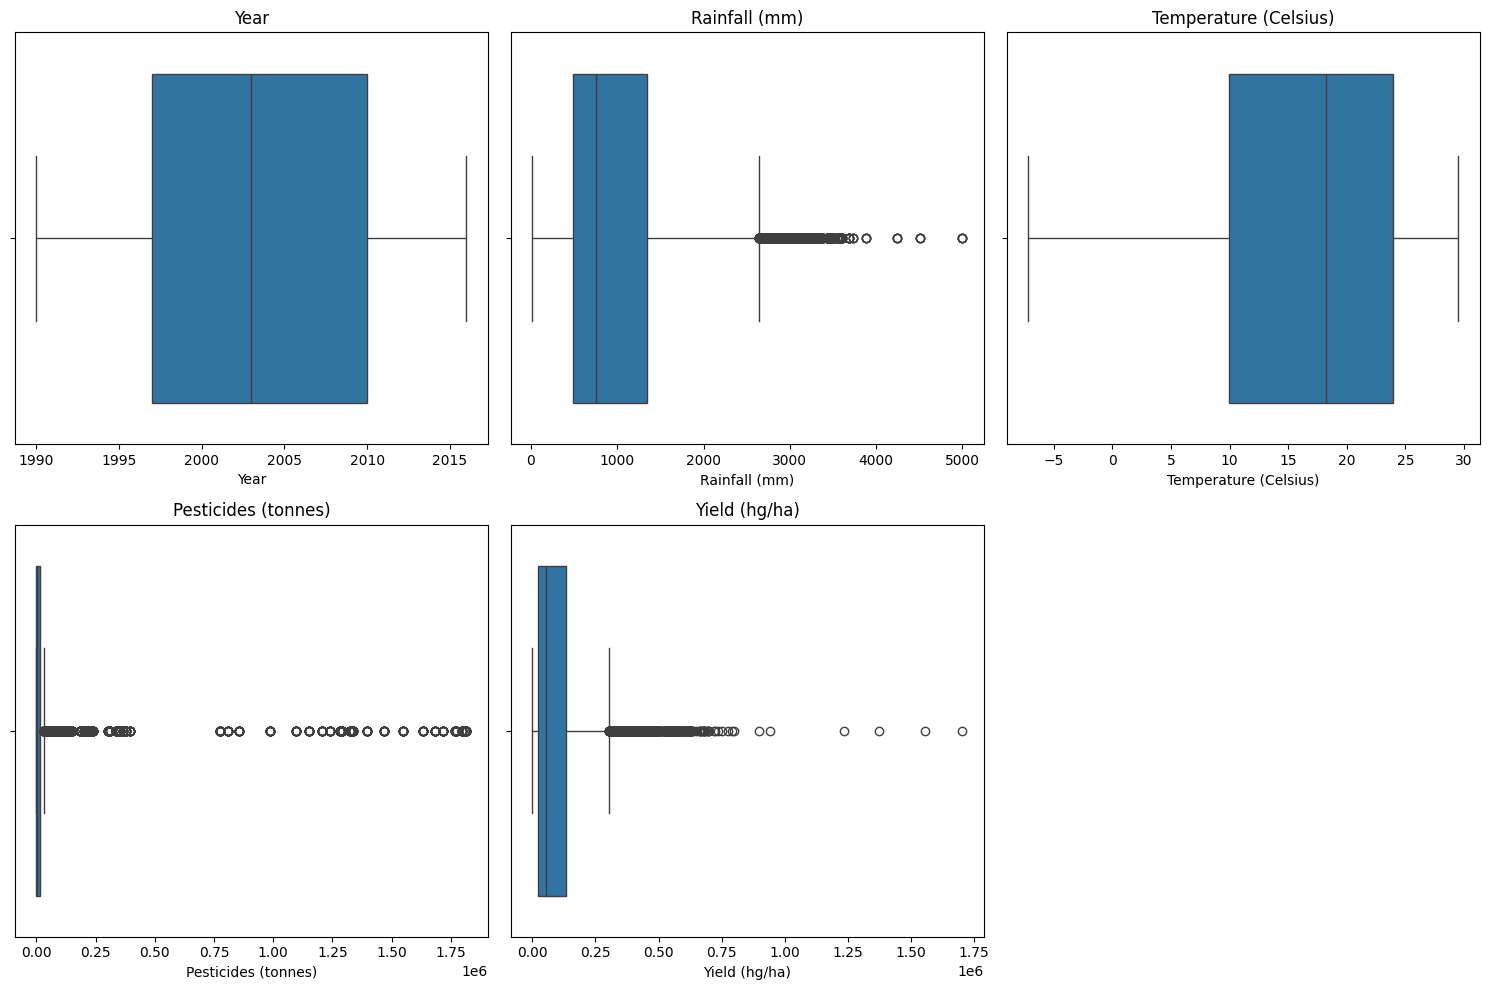

In [100]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

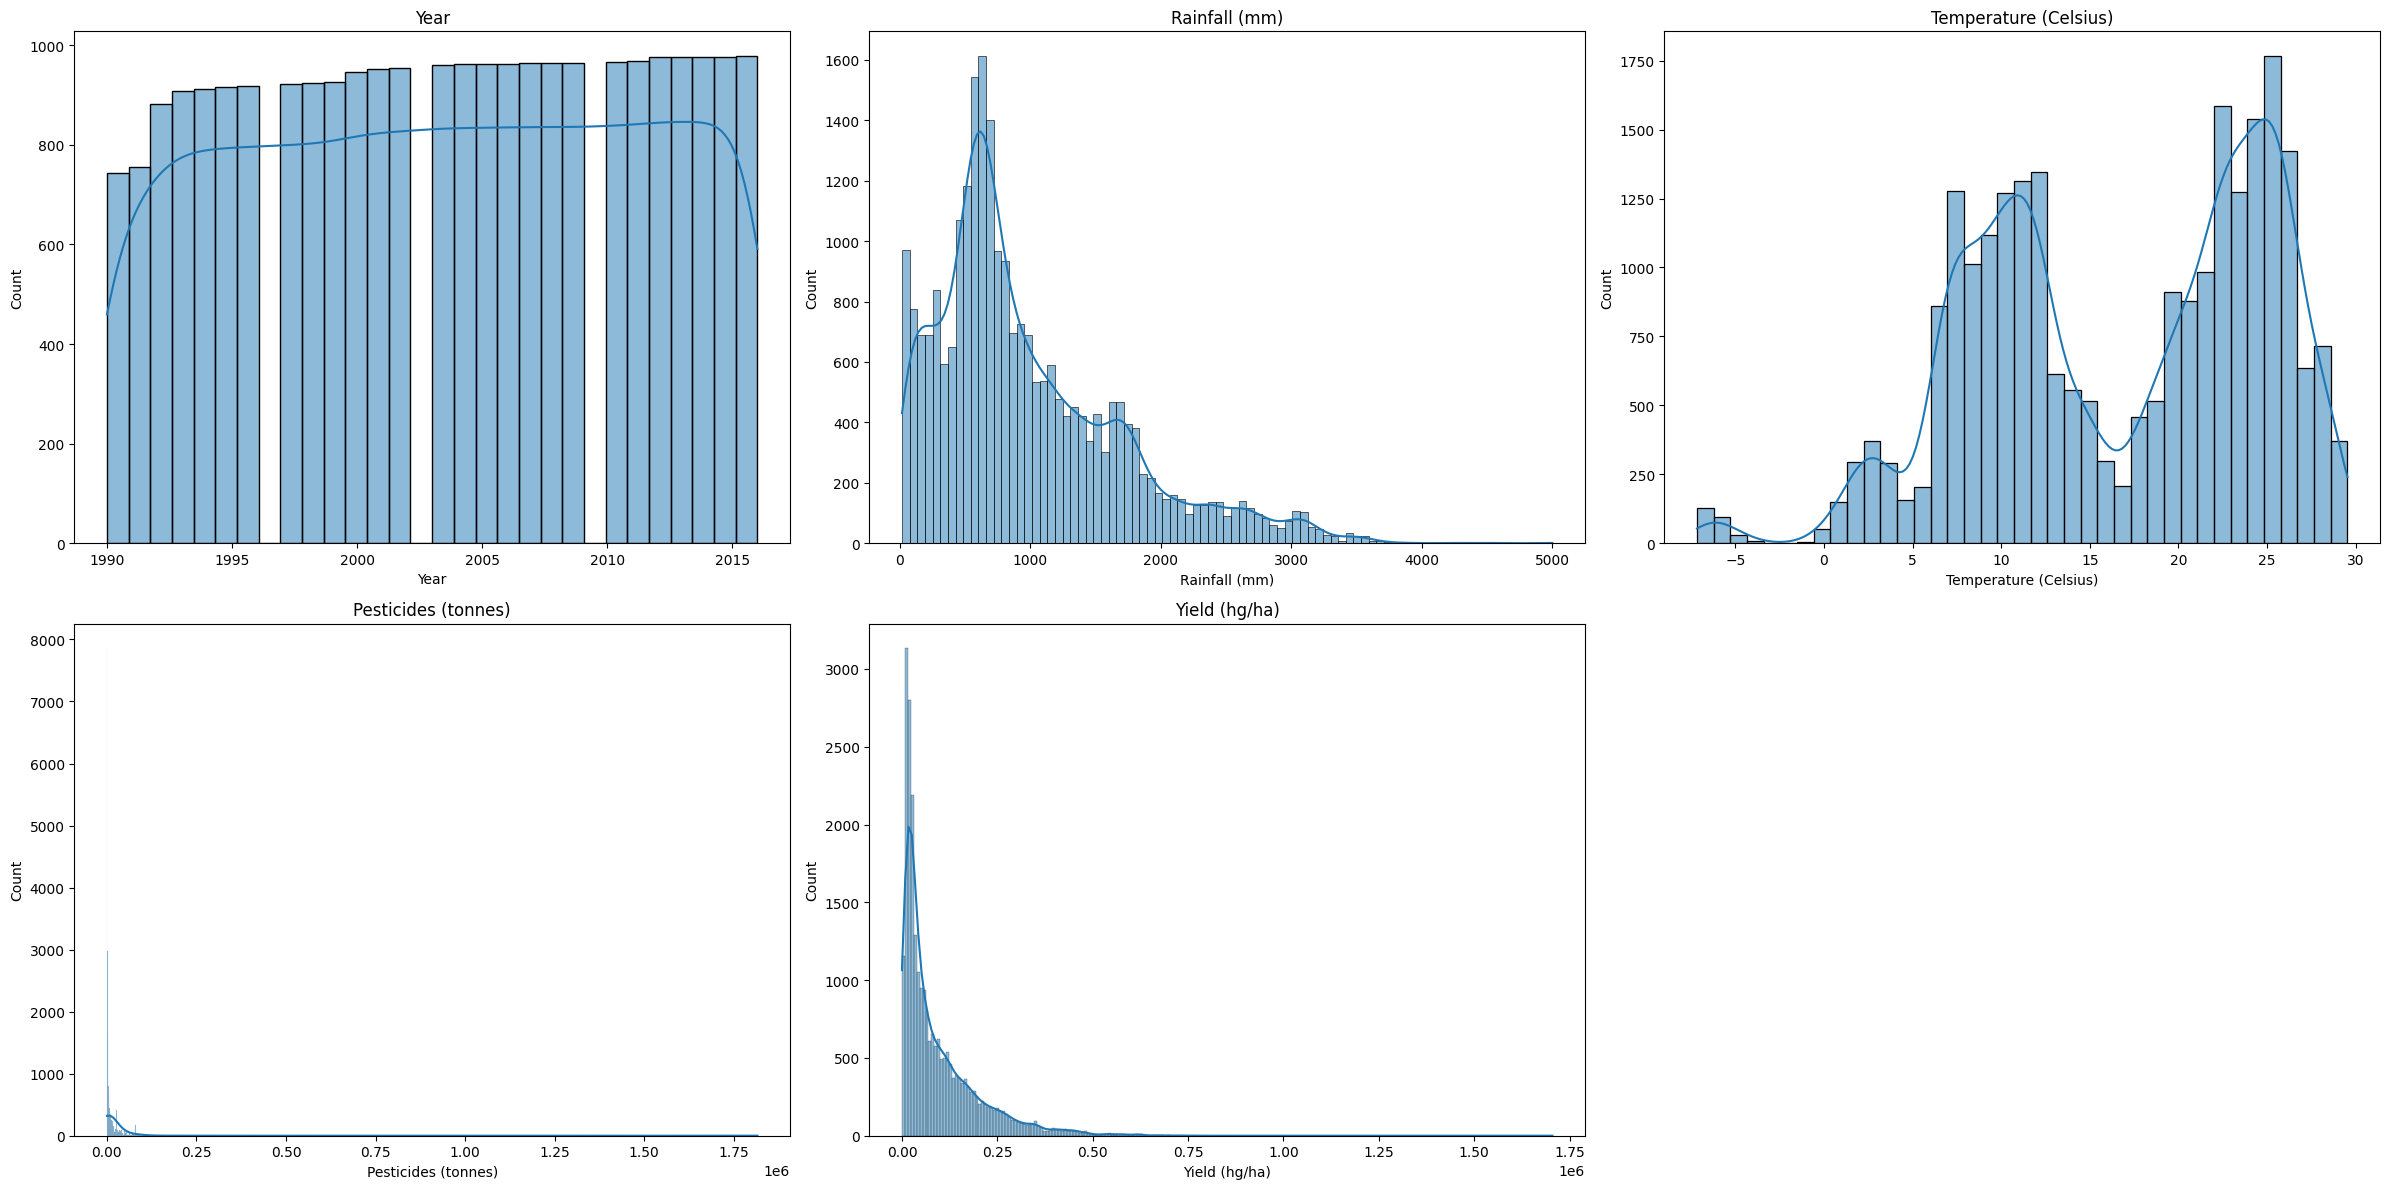

In [101]:
num_cols_per_row = 3
num_rows = (num_cols + num_cols_per_row - 1) // num_cols_per_row

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(num_cols_per_row * 8, num_rows * 6))

if isinstance(axes, np.ndarray):
    axes = axes.flatten()
elif num_rows == 1 and num_cols_per_row > 1:
    axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

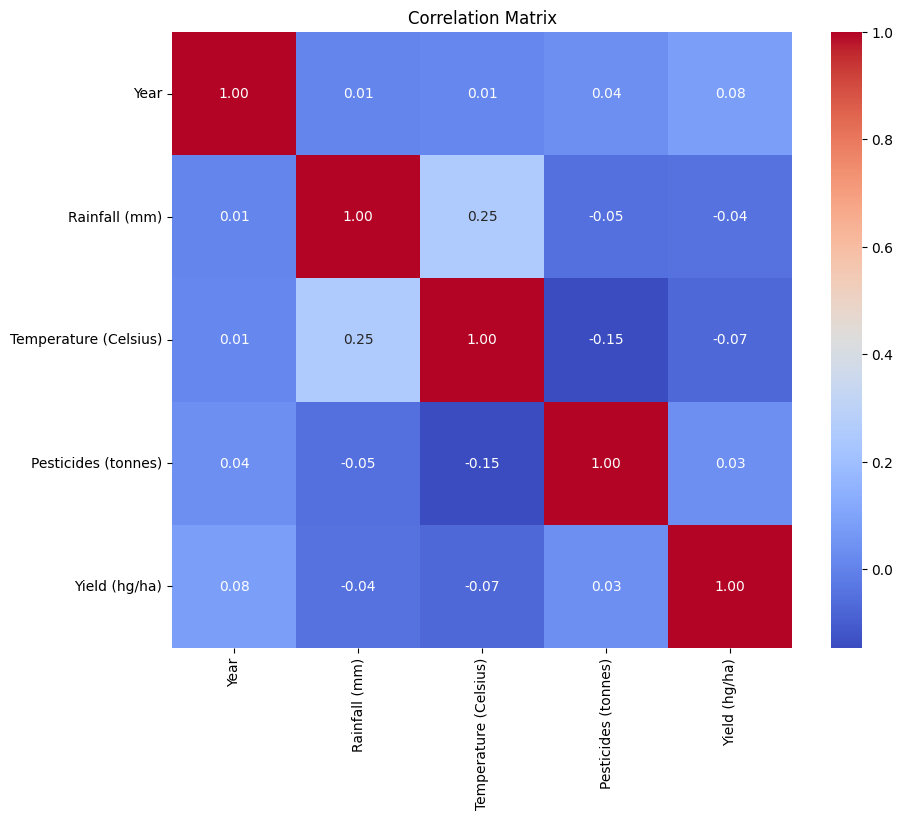

In [102]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

corr_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [111]:
columns_to_process = ['Rainfall (mm)', 'Pesticides (tonnes)', 'Yield (hg/ha)']
for _ in range(2):
    for column in columns_to_process:
        data.loc[:, column] = data[column].astype(np.float64).replace(0, 1e-6)
        data.loc[:, column] = np.log1p(data[column])

In [119]:
from sklearn.model_selection import train_test_split

X = data.drop('Yield (hg/ha)', axis=1)
y = data['Yield (hg/ha)']

X_numerical = X.select_dtypes(include=['float64', 'int64'])

X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size=0.2, random_state=42)

print(f'Training set size X: {X_train.shape}')
print(f'Test set size X: {X_test.shape}')
print(f'Training set size y: {y_train.shape}')
print(f'Test set size y: {y_test.shape}')

Training set size X: (20183, 4)
Test set size X: (5046, 4)
Training set size y: (20183,)
Test set size y: (5046,)


In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

print("Linear Regression:")
print(f"  MSE: {lr_mse:.4f}")
print(f"  RMSE: {lr_rmse:.4f}")
print(f"  MAE: {lr_mae:.4f}")
print(f"  R-squared: {lr_r2:.4f}")

Linear Regression:
  MSE: 0.0003
  RMSE: 0.0172
  MAE: 0.0109
  R-squared: 0.0142


In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

random_forest_model = RandomForestRegressor()

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print("Random Forest Regression:")
print(f"  MSE: {rf_mse:.2f}")
print(f"  RMSE: {rf_rmse:.2f}")
print(f"  MAE: {rf_mae:.2f}")
print(f"  R-squared: {rf_r2:.2f}")

Random Forest Regression:
  MSE: 0.00
  RMSE: 0.02
  MAE: 0.01
  R-squared: -0.06


In [122]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

xgboost_model = xgb.XGBRegressor(random_state=42)

xgboost_model.fit(X_train, y_train)

y_pred = xgboost_model.predict(X_test)

xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)

print("Gradient Boosting (XGBoost) Regression:")
print(f"  MSE: {xgb_mse:.2f}")
print(f"  RMSE: {xgb_rmse:.2f}")
print(f"  MAE: {xgb_mae:.2f}")
print(f"  R-squared: {xgb_r2:.2f}")

Gradient Boosting (XGBoost) Regression:
  MSE: 0.00
  RMSE: 0.02
  MAE: 0.01
  R-squared: 0.01


In [123]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

knn_model = KNeighborsRegressor()

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

knn_mse = mean_squared_error(y_test, y_pred)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)

print("KNN Regression:")
print(f"  MSE: {knn_mse:.2f}")
print(f"  RMSE: {knn_rmse:.2f}")
print(f"  MAE: {knn_mae:.2f}")
print(f"  R-squared: {knn_r2:.2f}")

KNN Regression:
  MSE: 0.00
  RMSE: 0.02
  MAE: 0.01
  R-squared: -0.09


In [124]:
model_metrics_data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'KNN Regression'],
    'R-squared': [lr_r2, rf_r2, xgb_r2, knn_r2],
    'MAE': [lr_mae, rf_mae, xgb_mae, knn_mae],
    'MSE': [lr_mse, rf_mse, xgb_mse, knn_mse],
    'RMSE': [lr_rmse, rf_rmse, xgb_rmse, knn_rmse]
}

metrics_df = pd.DataFrame(model_metrics_data)
metrics_df = metrics_df.set_index('Model')

pd.set_option('display.float_format', '{:.4f}'.format)

print("Model Performance Metrics Table:")
print(metrics_df)

Model Performance Metrics Table:
                   R-squared    MAE    MSE   RMSE
Model                                            
Linear Regression     0.0142 0.0109 0.0003 0.0172
Random Forest        -0.0617 0.0115 0.0003 0.0179
Gradient Boosting     0.0077 0.0109 0.0003 0.0173
KNN Regression       -0.0868 0.0116 0.0003 0.0181


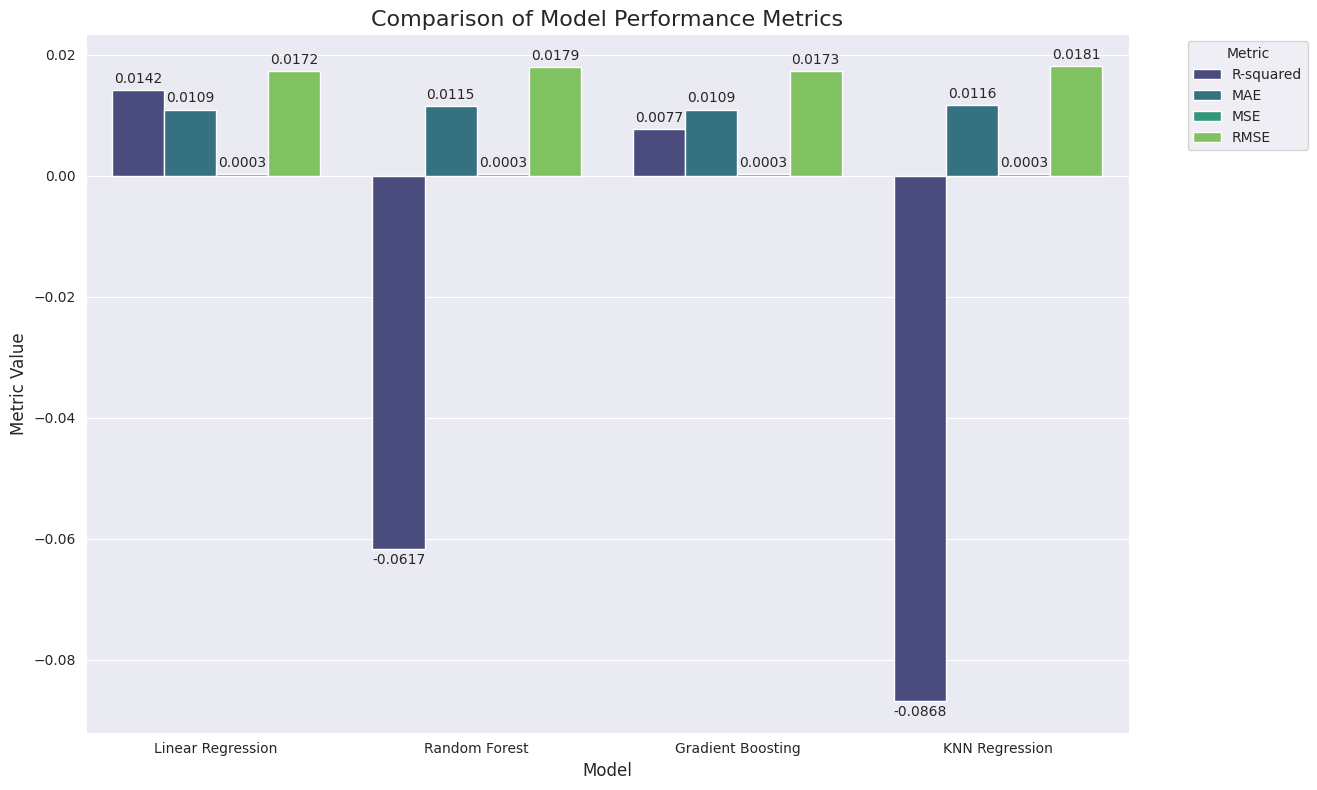

In [128]:
metrics_melted = metrics_df.reset_index().melt(id_vars='Model', var_name='Metric', value_name='Value')

sns.set_style("darkgrid")

plt.figure(figsize=(14, 8))

ax = sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_melted, palette='viridis')

plt.title('Comparison of Model Performance Metrics', fontsize=16)

plt.xlabel('Model', fontsize=12)

plt.ylabel('Metric Value', fontsize=12)

plt.xticks(rotation=0, ha='center')

plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', label_type='edge', padding=3)

plt.tight_layout(rect=[0, 0, 0.95, 1])

plt.show()